# Eliminating haze from the images 


### 1. Introduction
One of the important image processing applications is restoring images corrupted by various factors. 
Most of the outdoor images taken in bad weather conditions are degraded by floating particles 
in the atmosphere, such as smoke, dusk, fog and haze. The particles present in such atmospheric conditions absorb 
and scatter the light in the scene, and consequently degrades the contrast and color qualities of the image. 
For a degraded image, it becomes harder to apply computer vision systems such as feature detection, 
classification, and filtering. In the computer vision literature, there are several methods proposed to restore images
corrupted by bad atmospheric conditions. These methods are called "haze removal techniques". In this study, our aim is to 
do a comparative study between some haze removal techniques, and present an important application of haze removal, 
namely underwater image restoration. While there are some methods that use more than one image of the same scene to create
a high-quality image of the scene, our focus in this study will be on single image dehazing methods. 


### 2. Theoretical Background
Capturing a scene using a camera, the light reflected from the objects in the scene is attenuated along the line of sight.
This light is also blended with the light coming from all other directions, which is called the airlight [1]. 
The scattering that causes degradation in the captured image depends on the distance between the camera and the objects in
the scene. Therefore, the degradation level for each pixel in the image is usually different than the others.
In order to remove the haze, we need the depth information of the image. The depth information is usually unknown for 
an image, which makes haze removal a challenging task. In the proceeding section, we review the atmospheric scattering models
that help us undertand light in images better.

## Single Image Dehazing Methods

### 2.1 Attenuation Model
This model describes how the light reflected from the objects in the scene attenuates along 
the line of sight. Some of these reflected lights do not reach the camera due to scattering. 
The light that reaches the camera is given by:<br>
    $$\begin{align}
    E_{dt}(d,\lambda) = \frac{E_\infty(\lambda)r(\lambda)e^{-\beta(\lambda)d}}{d^2},
    \end{align}$$ <br>
where $d$ is the depth of the object in the scene, $\lambda$ is the wavelength of the light, $\beta(\lambda)$ is scattering coefficient of the atmosphere, 
$E_\infty$ is horizon brightness, and $r(\lambda)$ is a coefficient for reflactance properties.<br>
$E_{dt}(d,\lambda)$ is called the direct attenuation.<br>

### 2.2 Airlight Model
This model gives us a measure for calculating the irradiance coming from
the lights reflected from the objects in the environment. The irradiance is given by:<br>  
    $$\begin{align}
    E_a(d,\lambda) = (E(\lambda)r( 1 - e^{-\beta(\lambda)d}),
    \end{align}$$ <br>
The total irradiance is given by<br>
$$\begin{align}
  E_{total}(d,\lambda) = E_a(d,\lambda) + E_{dt}(d,\lambda).
  \end{align}$$ <br>
<figure>
<center><img src="Images/atmmodel.jpg" width=700px alt="default"/></center>
<figcaption align = "center"><b>Fig.1 - Summary of the atmospheric models: The dashed lines represent the airlight, whereas the solid lines represent the direct attenuation [1]</figcaption>
</figure> 
                                  

### 2.3 Formation of A Haze Image
The following model for the formation of a haze image is widely used in the computer vision literature:<br>
    $$\begin{align}
    \tag{1}
    I(x) = t(x)J(x) + (1 - t(x))A,
    \end{align}$$ <br>
where *I(x)* is the observed intensity or hazy image, *J(x)* is the image without haze, A is the global atmospheric light,
and t(x)  is the medium transmission. Here, the unknowns are *J(x)*, t(x) and A, whereas I have the *I(x)* for
a given hazy image. The term (1 - t(x))A is called airlight described in the previous section, and the term t(x)J(x)
is called direct attenuation. Airlight gives us a measure for the scattered light in the scene, while direct attenuation
describes the decay in the radiance in the image. <br>
If the atmosphere is homogenous, i.e. the floating particles are homogenously distributed in the atmosphere, *t(x)* is 
given as: <br>
    $$\begin{align}  \tag{2} t(x) = e^{-\beta d(x)},
    \end{align}$$ <br>
where *$\beta$* is the scattering coefficient, and *d(x)* is the scene depth. As can be seen from this equation, the
light is attenuated exponentially with the distance from the objects in the scene and the camera capturing the scene.


## 3 Haze Removal Techniques


### 3.1 Haze Removal using Histogram Equalization
Before reviewing some of the methods used in the literature, here we demonstrate the effect of one of the most widely used and 
basic techniques used for increasing the quality of an image, namely histogram equalization. The purpose of histogram equalization is
to improve the appearance of an image by flattening the brightness histogram of each of the RGB channels of an image. One 
example is given the following figue.<br>

<figure>
<center><img src="Images/histogramexample.jpg" width=700px alt="default"/></center>
<figcaption align = "center"><b>Fig.2 - Locally adaptive histogram equalization example: left image: original image; center image: block histogram equalization; right image: full locally adaptive equalization. [2]</figcaption>
</figure>

One might expect that as densely hazed pixels of a hazy image is have higher intensities if we darken those pixels using the whole
dynamic range, we might remove the haze and get a better looking image. In order to demonstrate the effect of haze removal
using histogram equalization, we apply the locally adaptive histogram equalization to hazy images. The method used is contrast-limited
adative histogram equalization (CLAHE).

In [5]:
# All imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from GuidedFilter import GuidedFilter
import scipy
from scipy import ndimage
import math
import skimage
from skimage.future import graph
from skimage.metrics import structural_similarity as ssim
from IPython.display import HTML
from IPython.display import display
import copy
import os
import datetime
import natsort
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

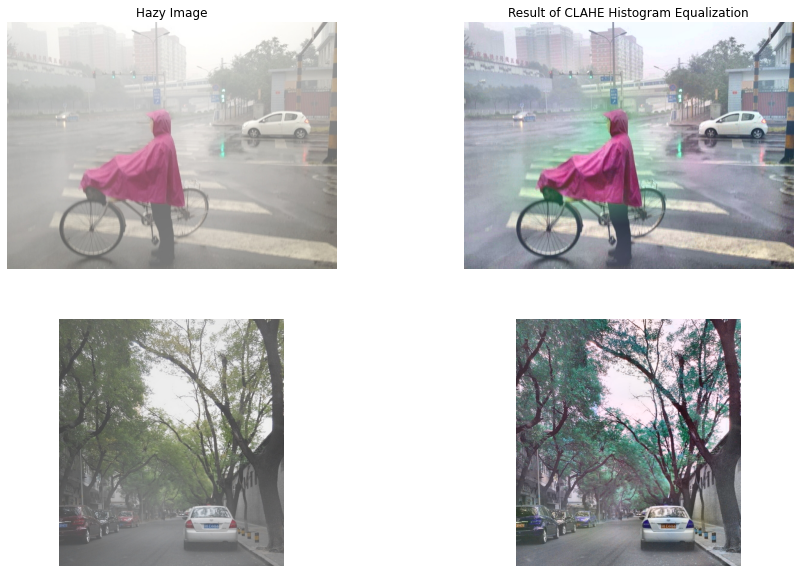

In [6]:
#CLAHE for color images

or_1 = plt.imread('Images/0018.jpg') 
lab = cv2.cvtColor(or_1, cv2.COLOR_BGR2LAB) # convert rgb to lab format
#lab_RGB = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
lab[...,0] = clahe.apply(lab[...,0])
lab[...,1] = clahe.apply(lab[...,1])
lab[...,2] = clahe.apply(lab[...,2])

result1 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
cv2.imwrite('Images/clahe_0018.jpg',result1)

or_2 = plt.imread('Images/0014.jpg') 
lab = cv2.cvtColor(or_2, cv2.COLOR_RGB2LAB) # convert rgb to lab format
#lab_RGB = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
lab[...,0] = clahe.apply(lab[...,0])
lab[...,1] = clahe.apply(lab[...,1])
lab[...,2] = clahe.apply(lab[...,2])
result2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
cv2.imwrite('Images/clahe_0014.jpg', result2)

#plot hazy images and the results
fig, ax = plt.subplots(ncols=2, nrows =2,figsize=(15, 10))
ax[0][0].imshow(or_1)
ax[0][0].set_title("Hazy Image")
ax[0][0].axis('off')
ax[0][1].imshow(result1)
ax[0][1].axis('off')
ax[0][1].set_title("Result of CLAHE Histogram Equalization")
ax[1][0].axis('off')
ax[1][0].imshow(or_2)
ax[1][0].axis('off')
ax[1][1].imshow(result2)
ax[1][1].axis('off')
plt.show()

Comparing the above hazy images and restored images, we observe that the haze in the images can be reduced by using CLAHE histogram equalization.
We will compare these results with the results of the other methods that will be discussed. Next, we look at a method 
based on using dark channel prior and discus its performance.

## 3.2 Single Image Haze Removal Using Dark Channel Prior
Proposed by: Kaiming He, Jian Sun, Xiaoou Tang <br>
Paper: Kaiming He, Jian Sun and Xiaoou Tang, "Single image haze removal using dark channel prior," 2009 IEEE Conference on Computer Vision and Pattern Recognition, 2009, pp. 1956-1963, doi: 10.1109/CVPR.2009.5206515.

### 3.2.1 Introduction to the method
The key observation that led to the method presented in this paper is that it is very high likely that in an image without haze,
some pixels have very low intensity in at least one color channel. This observation does not apply to regions covering the sky.
These pixels with low intensities are called "dark pixels".
In a hazy image, the dark pixels' intensity is increased by the contribution from the airlight in the scene. 
Therefore, the transmission *t(x)* of an image without haze is lower than the hazy version of the image.
In the following 
figure, the dark channels of images without haze and a hazy image are shown to demonstrate this.<br>
<figure>
<center><img src="Images/darkchannels.jpg" width=700px alt="default"/></center>
<figcaption align = "center"><b>Fig.3- Dark pixels of haze-free images and a hazy image [3]. Notice the higher intensities in the densely hazed parts of the right-most image.<br></figcaption>
</figure>


We can express the dark channel of a patch in an image by the following equation:<br><br>
$$ \begin{align}
\tag{3}
J^{dark}(x) = \min_{ c \in \{r,g,b\} } (\min_{y \in \Omega(x) } J^{c}(x) ), 
\end{align}$$<br>
where  $J^{dark}(x)$ is the dark channel of the image, $\Omega(x)$ is a local patch in the image, and $J^{c}(x)$ is one of the RGB channels. If the image J is a haze-free
image, the intensity of $J^{dark}(x)$ approaches to zero. On the contrast, if the image is hazy, the hazy parts of the image 
will have higher intensity in their dark channel. Below is the Python code implementation of extracting the dark channel 
of an image.
    

In [7]:
# Get the dark channel of the image

def get_dark_channel (image, patch_size):
    """Get the dark channel prior in the image.
    Parameters
    -----------
    image:  RGB image
    patch_size:  patch size for calculating the dark channel
    Return
    -----------
    The dark channel prior of the image.
    """
    B,G,R = cv2.split(image)
    min_of_min = cv2.min(cv2.min(R,G),B);
    patch = cv2.getStructuringElement(cv2.MORPH_RECT,(patch_size,patch_size))
    dark_channel = cv2.erode(min_of_min,patch)
    return dark_channel


### 3.2.2 Estimating the Transmission ($t(x)$)
Using the dark channel prior, the transmission $\tilde{t}(x)$ is derived to be:<br>
$$ \begin{align}
\tag{4}
\tilde{t}(x)  = 1 - \min_{ c \in \{r,g,b\} } (\min_{ y \in \Omega(x) } \frac{I^{c}(y)}{A^{c}} ) .
\end{align} $$<br>
$\min_{ c \in \{r,g,b\} } (\min_{ y \in \Omega(x) } \frac{I^{c}(y)}{A^{c}} )$ is the dark channel of the normalized image. 
Even in the most clear atmospheric conditions some particles are present in the atmosphere. In an image, the scattering caused by these 
floating particles give us the feeling of depth. Thus, we do not completely get rid of the haze so as not to lose the feeling 
of depth. The refined equation is:<br>
$$ \begin{align}
\tag{5}
\tilde{t}(x)  = 1 - \omega \min_{ c \in \{r,g,b\} } (\min_{ y \in \Omega(x) } \frac{I^{c}(y)}{A^{c}} ),
\end{align} $$<br>
where $\omega$ is a parameter between 0 and 1. In this implementation of the method, we keep $\omega$ 0.95.

Before estimating the transmission, we first need to find the atmospheric light $A$. To calculate $A$ from the hazy image,
we can first pick a small portion of the pixels with the highest intensity in the dark channel.
Then, we can average the values of the brightest pixels to estimate the atmospheric light. Here, we look at the top 0.1%
brighest pixels, and average them to get $A$. The Python implementation is as follows:

In [8]:
# Get the atmospheric light of the image

def get_atmospheric_light(image,dark_channel):
    """Get the atmosphere light in the image.
    Parameters
    -----------
    image:  RGB image
    dark_channel: The dark channel of the image input
    Return
    -----------
    Array of size 3x1 containing the atmospheric light for each RGB channel
    """
    [h,w] = image.shape[:2] #get the image size
    size = h*w
    number_of_pixels = int(max(math.floor(size/1000),1)) #pick the top 0.1% brightest pixels
    dark_vec = dark_channel.reshape(size); #convert the dark  channel value into an array
    image_vec = image.reshape(size,3); #convert the image into an array
    indices = dark_vec.argsort(); # sort the dark channel values to find the brightest
    indices = indices[size-number_of_pixels::] #get the indices of the brighest pixels
    atmospheric_light = np.zeros([1,3]) # initialize the atmospheric light values for each RGB channel
    for i in range(1,number_of_pixels):
        atmospheric_light = atmospheric_light + image_vec[indices[i]] #sum the pixel values of the brightest pixels for each channel
    A = atmospheric_light / number_of_pixels; 
    return A

In [9]:
#Estimate the transmission (this is an implementation of Equation 5)

def get_transmission(image,A,patch_size):
    """Get the transmission estimate.
    Parameters
    -----------
    image:   RGB image
    A:       3x1 array of atmospheric light for each RGB channel
    patch_size:  patch size 
    Return
    -----------
    Transmission estimate
    """
    omega = 0.95; # this parameter is for keeping the resulting image natural
    t = np.empty(image.shape,image.dtype); #initialize a matrix to keep transmission estimates
    for i in range(0,3):
        t[:,:,i] = image[:,:,i]/A[0,i] # get the normalized image values for each RGB channel
    transmission = 1 - omega*get_dark_channel(t,patch_size); # equation 5
    return transmission

### 3.2.3 Soft Matting
To refine the estimated transmission, we can use a Soft Matting algorithm. In order to do that, we minimize the cost
function $E(t)$, which is defined as:<br><br>
$$ \begin{align}
\tag{6}
E(t)  = t^{T}Lt + \lambda(t-\tilde{t})^{T}(t-\tilde{t}),
\end{align} $$<br>
where $t$ is the array version of the transmission map, $\tilde{t}$ is the array version of the estimated transmission map,
$L$ is the Matting Laplacian matrix, and $\lambda$ is the regularization parameter. 
The (i,j)th element of $L$ is given by<br><br>
$$ \begin{align}
\tag{6}
\sum \limits_{k | (i,j) \in  \omega_k} (\delta_{ij} - \frac{1}{|\omega_k|}(1 + (I_i - \mu _k)^T (\sum _k + \frac{\epsilon}{|\omega_k|}U_3)^{-1} (I_j - \mu _k )),
\end{align} $$<br>
where $|\omega_k|$ is the number of pixels in the window $\omega_k$, $I_i$ and $I_j$ are the colors of the input image $I$ at pixels $i$ and $j$,
$\delta_{ij}$ is the Kronecker delta, $\mu _k$ and $\sum _k$ are the mean and covarince matrix of the colors in window
$\omega_k$, $U_3$ is 3x3 identity matrix, $\epsilon$ is the regularization parameter.<br>                                  


The solution to the above minimization problem
is given by:<br><br>
$$ \begin{align}
\tag{8}
(L + \lambda U)t = \lambda \tilde{t},
\end{align} $$<br>
where $U$ is the identity matrix with the same size as $L$.
We can choose a small value for $\lambda$ to make matting soft. Here, it is chosen to be $10^{-4}$. The whole refinement 
boils down to a guided filter with the guidance of the input image $I$. This guided filter can be also expressed in the following way.
If we denote the transformation of an image $I$ in a window $\omega_k$ with radius r centered at the pixel k with p, we get the following 
equation:<br><br>
$$ \begin{align}
\tag{9}
q_i  = a_k^TI_k + b_k, \forall i \in \omega_k
\end{align} $$<br>  
where where $a_k$ is a 3 × 1 coefficient vector, $b_k$ is a scalar coefficient, and $I_k$ is a 3 × 1 color vector. $a$ and $b$ are computed by<br><br>
$$ \begin{align}
\tag{10}
a_k = (\sum _k + \epsilon U)^{-1}(\frac{1}{|\omega_k|}\sum\limits_{i \in \omega_k}I_ip_i - \mu _k\bar{p}_k),
\end{align} $$<br><br>
$$ \begin{align}
\tag{11}
b_k = \bar{p}_k - a_k^T\mu _k,
\end{align} $$<br> 
where $\bar{p}_k$ is the mean of the filter p in $\omega$, $\bar{a}_i$ is the mean of the coefficient $a$,
and $\bar{b}_i$ is the mean of the coefficient $b$. 
Then $q_i$ is <br><br>
$$ \begin{align}
\tag{12}
q_i = \bar{a_i}^TI_i + \bar{b}_i.
\end{align} $$<br> 





The Python implementation is the following function:

In [10]:
#Soft matting algorithm to refine the transmission estimate

def soft_matting(image,fltr,r,epsilon):
    """Softmatting algorithm
    Parameters
    -----------
    image:  input RGB image
    fltr:   filter to be guided (the estimated transmission map)
    r:   radius of the guidance
    epsilon: regularizing parameter
    Return
    -----------
    Guided filter.
    """
    mean_image = cv2.boxFilter(image,cv2.CV_64F,(r,r)); #filter the input image with a mean kernel of size rxr
    mean_fltr = cv2.boxFilter(fltr, cv2.CV_64F,(r,r)); #filter the filter with a mean kernel of size rxr
    mean_imagef = cv2.boxFilter(image*fltr,cv2.CV_64F,(r,r)); #filter input image with the filter, and then filter the result with the mean filter
    cov_imagef = mean_imagef - mean_image*mean_fltr; #covariance of the input image and the filter to be guided
    mean_image2 = cv2.boxFilter(image*image,cv2.CV_64F,(r,r));
    variance_image   = mean_image2 - mean_image*mean_image; #find the variance of the input image
    a = cov_imagef/(variance_image + epsilon); #calculate coefficient a (Equation 10)
    b = mean_fltr - a*mean_image; #calculate coefficient b (Equation 11)
    mean_a = cv2.boxFilter(a,cv2.CV_64F,(r,r)); #calculate mean of coefficient a
    mean_b = cv2.boxFilter(b,cv2.CV_64F,(r,r)); #calculate mean of coefficient b
    q = mean_a*image + mean_b; #Equation 12
    return q;

In [11]:
#Calculate the refined transmission matrix using the function soft_matting(image,fltr,r,epsilon)

def refined_transmission(image,transmission_estimate):
    """Calculate refined transmission map
    Parameters
    -----------
    transmission_estimate: estimated transmission map
    Return
    -----------
    Refined transmission matrix.
    """
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY); # convert the image into gray scale
    gray_image = np.float64(gray_image)/255;
    r = 60; #radius of the guidance
    epsilon = 0.0001;
    refined = soft_matting(gray_image,transmission_estimate,r,epsilon);
    return refined;


### 3.2.4 Recovering the Scene Raidance
Looking back at Equation 1, since now we have the atmospheric light information and 
a tranmission estimate, we can calculate the scene radiance $J(x)$. The equation is the following:<br><br>
$$ \begin{align}
\tag{13}
J(x) = \frac{I(x) - A}{\max(\tilde{t}(x), t_0)} + A,
\end{align} $$<br>
where $t_0$ is a lower bound to keep a small amount of haze in the final image. We use 0.1 for $t_0$.
The Python implementation is as follows:

In [12]:
#Recover the scene radiance matrix J

def recover_j(image,transmission_estimate,A,t0):
    """Recover the scene radiance J
    Parameters
    -----------
    image:  input RGB image
    transmission_estimate: estimated transmission map
    A: atmospheric light
    t0: lower bound for keeping some amount of haze in the image
    
    Return
    -----------
    Scene radiance matrix.
    """
    scene_radiance = np.empty(image.shape,image.dtype); #initialize J matrix
    transmission_estimate = cv2.max(transmission_estimate,t0);
    for i in range(0,3):
        scene_radiance[:,:,i] = (image[:,:,i]-A[0,i])/transmission_estimate + A[0,i] # Equation 13 for each RGB channel
    return scene_radiance

Now, we can apply the above functions to refine hazy images.

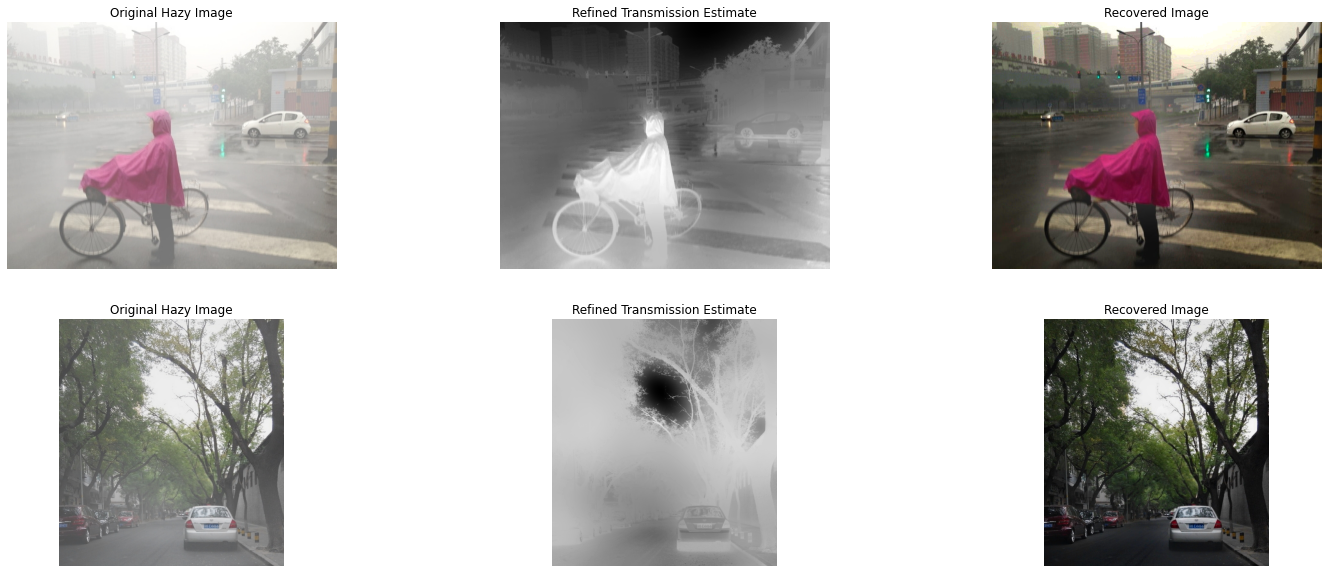

In [13]:
#main function

if __name__ == '__main__':
    
    input1 = plt.imread('Images/0018.jpg' );
    image1 = input1.astype('float64')/255;
 
    dark_channel = get_dark_channel(image1,15); #choose patch size to be 15x15
    A = get_atmospheric_light(image1,dark_channel);
    transmission_estimate_first = get_transmission(image1,A,15);
    transmission_estimate_refined1 = refined_transmission(input1,transmission_estimate_first);
    J1 = recover_j(image1,transmission_estimate_refined1,A,0.1); #choose t_0 to be 0.1
    
    input2 = plt.imread('Images/0014.jpg' );
    image2 = input2.astype('float64')/255;
 
    dark_channel = get_dark_channel(image2,15); #choose patch size to be 15x15
    A = get_atmospheric_light(image2,dark_channel);
    transmission_estimate_first = get_transmission(image2,A,15);
    transmission_estimate_refined2= refined_transmission(input2,transmission_estimate_first);
    J2 = recover_j(image2,transmission_estimate_refined2,A,0.1); #choose t_0 to be 0.1
    
    #plot the results
    J1_plot = np.clip(J1, 0, 1)  #convert recovered image into plotable format  
    J2_plot = np.clip(J2, 0, 1)  #convert recovered image into plotable format  
    fig, ax = plt.subplots(ncols=3,nrows=2, figsize=(25, 10))
    ax[0][0].imshow(input1)
    ax[0][0].set_title("Original Hazy Image")
    ax[0][0].axis('off')
    ax[0][1].imshow(transmission_estimate_refined1, cmap='gray')
    ax[0][1].set_title("Refined Transmission Estimate")
    ax[0][1].axis('off')
    ax[0][2].imshow(J1_plot)
    ax[0][2].set_title("Recovered Image")
    ax[0][2].axis('off')
    ax[1][0].imshow(input2)
    ax[1][0].set_title("Original Hazy Image")
    ax[1][0].axis('off')
    ax[1][1].imshow(transmission_estimate_refined2, cmap='gray')
    ax[1][1].set_title("Refined Transmission Estimate")
    ax[1][1].axis('off')
    ax[1][2].imshow(J2_plot)
    ax[1][2].set_title("Recovered Image")
    ax[1][2].axis('off')
    plt.show()

## 3.3 A Fast Single Image Haze Removal Algorithm Using Color Attenuation Prior

**Author:** Qingsong Zhu, Jiaming Mai, and Ling Shao

**Conference:** IEEE Transactions on Image Processing 2015

This is an implementation of the "A fast Single Image Haze Removal Algorithm Using Color Attenuation Prior" paper. https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7128396

In [14]:
# segmentation
def _weight_mean_color(graph, src, dst, n):

    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}

def merge_mean_color(graph, src, dst):

    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] /
                                      graph.nodes[dst]['pixel count'])
def segmentation_merge(img):
    labels = skimage.segmentation.slic(img, compactness=30, n_segments=600, start_label=1)
    g = graph.rag_mean_color(img, labels)
    labels1 = graph.merge_hierarchical(labels, g, thresh=15, rag_copy=False, in_place_merge=True,
                                       merge_func=merge_mean_color, weight_func=_weight_mean_color)
    return labels1

In [15]:
def calDepthMap_nei(I, r):
    # calculate the depth of picture

    hsvI = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
    s = hsvI[:, :, 1] / 255.0  # saturation component
    v = hsvI[:, :, 2] / 255.0  # brightness component

    sigma = 0.041337
    sigmaMat = np.random.normal(0, sigma, (I.shape[0], I.shape[1]))  # random error of the model

    output = 0.121779 + 0.959710 * v - 0.780245 * s + sigmaMat  # eq.8
    outputPixel = output
    output = scipy.ndimage.minimum_filter(output, (r, r))  # eq.21
    outputRegion = output
    return outputRegion, outputPixel

def calDepthMap_seg(I):
    # calculate the depth of picture

    labels = segmentation_merge(I*255)
    hsvI = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
    s = hsvI[:, :, 1] / 255.0  # saturation component
    v = hsvI[:, :, 2] / 255.0  # brightness component

    sigma = 0.041337
    sigmaMat = np.random.normal(0, sigma, (I.shape[0], I.shape[1]))  # random error of the model

    output = 0.121779 + 0.959710 * v - 0.780245 * s + sigmaMat  # eq.8
    outputPixel = output
    # eq.21
    minimum = ndimage.minimum(output, labels=labels, index=np.arange(np.min(labels), np.max(labels)+1))
    for i in range(output.shape[0]-1):
        for j in range(output.shape[1]-1):
            label_pixel = labels[i, j]
            output[i, j] = minimum[label_pixel]
    outputRegion = output

    return outputRegion, outputPixel

def calfinalimage(I, t, a):
    # Claculate eq.23
    if I.dtype == np.uint8:
        I = np.float32(I) / 255

    h, w, c = I.shape
    J = np.zeros((h, w, c), dtype=np.float32)
    t0, t1 = 0.05, 1
    t = t.clip(t0, t1)  # Let t(x) between 0.05 to 1

    for i in range(3):
        J[:, :, i] = I[:, :, i] - a[0, i]
        J[:, :, i] = J[:, :, i] / t
        J[:, :, i] = J[:, :, i] + a[0, i]

    return J

def estA(I, Jdark):
    # estamitate atmospheric light A

    h, w, c = I.shape
    if I.dtype == np.uint8:
        img = np.float32(I) / 255

    # Compute number for 0.1% brightest pixels
    n_bright = int(np.ceil(0.001 * h * w))
    #  Loc contains the location of the sorted pixels
    reshaped_Jdark = Jdark.reshape(1, -1)
    Loc = np.argsort(reshaped_Jdark)

    # column-stacked version of I
    Ics = img.reshape(1, h * w, 3)
    ix = img.copy()

    # init a matrix to store candidate airlight pixels
    Acand = np.zeros((1, n_bright, 3), dtype=np.float32)
    # init matrix to store largest norm arilight
    Amag = np.zeros((1, n_bright, 1), dtype=np.float32)

    # Compute magnitudes of RGB vectors of A
    for i in list(range(n_bright)):
        x = Loc[0, h * w - 1 - i]
        ix[int(x / w), int(x % w), 0] = 0
        ix[int(x / w), int(x % w), 1] = 0
        ix[int(x / w), int(x % w), 2] = 1

        Acand[0, i, :] = Ics[0, Loc[0, h * w - 1 - i], :]
        Amag[0, i] = np.linalg.norm(Acand[0, i, :])

    # Sort A magnitudes
    reshaped_Amag = Amag.reshape(1, -1)
    Y2 = np.sort(reshaped_Amag)
    Loc2 = np.argsort(reshaped_Amag)
    # A now stores the best estimate of the airlight
    if len(Y2) > 20:
        A = Acand[0, Loc2[0, n_bright - 19:n_bright], :]
    else:
        A = Acand[0, Loc2[0, n_bright - len(Y2):n_bright], :]

    return A

### 3.3.1 Model

The index of the $x$ location in the image can be expressed as:

$
\begin{align}
I(x) & = J(x)t(x) + A(1-t(x))\\
t(x) & = e^{-\beta d(x)}
\end{align}
$

where $I$ is hazy image, $J$ is the scene radiance representing the haze-free image,and $A$ is the atmospheric light

$t$ is the medium transmission, $\beta$ is the scattering coefficient of the atmosphere and $d$ is the depth of scene

The goal is to estimate $A$ and $t$

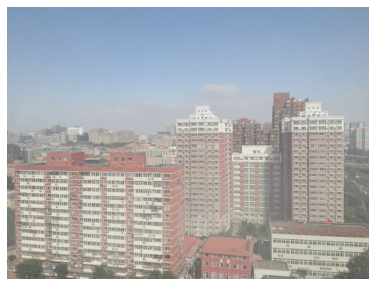

In [16]:
# setting of parameters
inputImagePath = "Images/0001.jpg"  # the path of the picture
r = 15  # from eq.21
beta = 1  # from eq.23
gimfiltR = 60  # the radius parameters for guided image filtering (Figure 8(d))
eps = 10 ** -3  # the epsilon parameters for guided image filtering (Figure 8(d))

# read image 
I = cv2.imread(inputImagePath)

rgb_I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(ncols=1, figsize=(10,5))
ax.imshow(rgb_I)
ax.axis('off')
plt.show()

### 3.3.2 Color Attenuation Prior


### $t(x) = e^{-\beta d(x)}$

<div>
<img src="Images/v_s.JPG" width="400" align="left"/>
</div>

Caused by the airlight, the brightness is increased while the saturation is decreased

The denser the haze is, the stronger the influence of the airlight

Hazy regions in the image are characterized by high brightness and low saturation

In general, the concentration of the haze increases along with the change of the scene depth

<div>
<img src="Images/weather.JPG" width="500"/>
</div>

### 3.3.3 Scene Depth Restoration

### $t(x) = e^{-\beta d(x)}$

$d(x) \propto c(x) \propto v(x)-s(x)$

where $d$ is the scene depth, $c$ is the concentration of the haze

$v$ is the brightness of the scene and $s$ is the saturation

$d(x) = \theta_0 + \theta_1 v(x) + \theta_2 s(x) + \varepsilon (x)$

Use the gradient descent algorithm to estimate their values

Choose $\theta_0 = 0.121779$, $\theta_1 = 0.959710$, $\theta_2 = -0.780245$, and $\sigma = 0.041337$ for our experienment. (Same as paper setting)

### 3.3.4 Scene Depth Restoration

### $t(x) = e^{-\beta d(x)}$

Based on the assumption that the scene depth is locally constant in the **neighborhood**

$d_r (x) = \displaystyle\min_{y \in \Omega_{r} (x)} d(y)$

where $\Omega_{r} (x)$ is an $r \times r$ neighborhood centered at $x$

Based on the assumption that the scene depth is locally constant in the **segmentation region** (Region Splitting and Merging)

$d_r (x) = \displaystyle\min_{y \in r(x)} d(y)$

where $r(x)$ is the segmentation region with pixel $x$

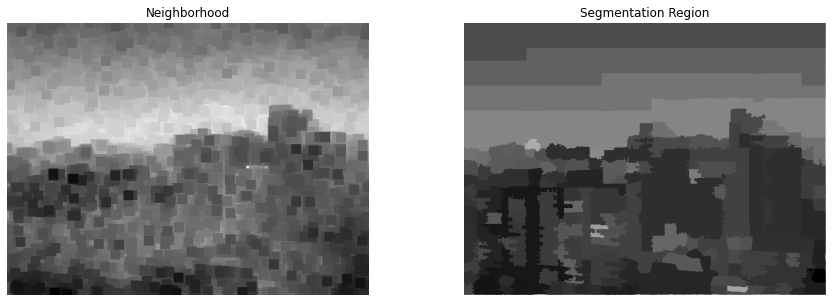

In [17]:
# Calculate d(x)
dR_nei, dP_nei = calDepthMap_nei(I, r)  
dR_seg, dP_seg = calDepthMap_seg(I)
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(dR_nei * 255, cmap='gray')
ax[0].set_title("Neighborhood")
ax[0].axis('off')
ax[1].imshow(dR_seg * 255, cmap='gray')
ax[1].set_title("Segmentation Region")
ax[1].axis('off')
plt.show()

### 3.3.5 Smooth the Image

Use the guided image filtering to smooth the image

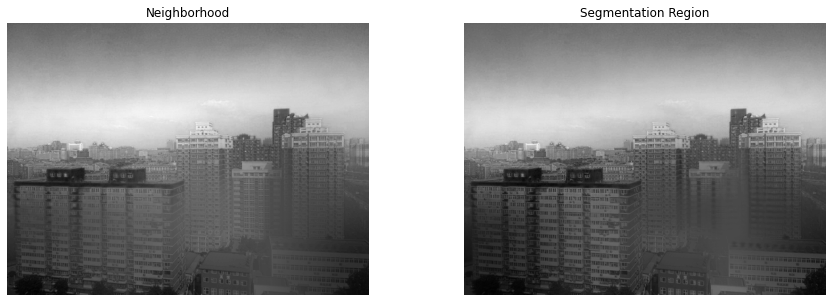

In [18]:
# use guided image filtering to smooth image
guided_filter = GuidedFilter(I, gimfiltR, eps)
refineDR_nei = guided_filter.filter(dR_nei)
refineDR_seg = guided_filter.filter(dR_seg)

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(refineDR_nei * 255, cmap='gray')
ax[0].set_title("Neighborhood")
ax[0].axis('off')
ax[1].imshow(refineDR_seg * 255, cmap='gray')
ax[1].set_title("Segmentation Region")
ax[1].axis('off')
plt.show()

### 3.3.6 Medium Transmission

$t(x) = e^{-\beta d(x)}$, where $\beta = 1$

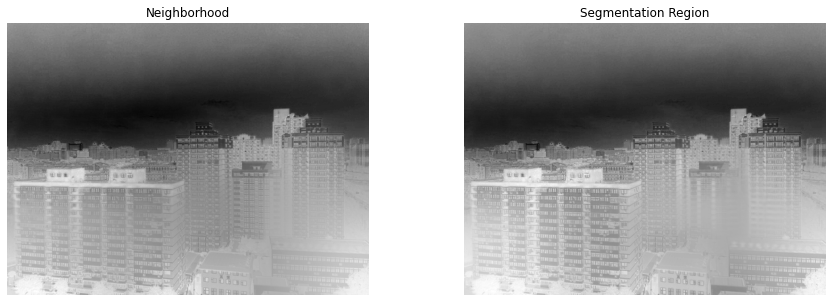

In [19]:
tR_nei = np.exp(-beta * refineDR_nei)
tP_nei = np.exp(-beta * dP_nei)
tR_seg = np.exp(-beta * refineDR_seg)
tP_seg = np.exp(-beta * dP_seg)

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(tR_nei * 255, cmap='gray')
ax[0].set_title("Neighborhood")
ax[0].axis('off')
ax[1].imshow(tR_seg * 255, cmap='gray')
ax[1].set_title("Segmentation Region")
ax[1].axis('off')
plt.show()

### 3.3.7 Estimation of the Atmospheric Light

$
\begin{align}
I(x) & = J(x)t(x) + A(1-t(x))\\
t(x) & = e^{-\beta d(x)}
\end{align}
$

$I(x) = A$, $d(x) \rightarrow \infty$

In other words, 

$A = I(x)$, $x \in \{ x | \forall y: d(y) < d(x) \}$

In [20]:
# estamitate atmospheric light A
A_nei = estA(I, dR_nei)
A_seg = estA(I, dR_seg)

### 3.3.8 Scene Recovery

$
\begin{align}
I(x) & = J(x)t(x) + A(1-t(x))\\
t(x) & = e^{-\beta d(x)}
\end{align}
$

$I$ is hazy image, $J$ is the scene radiance representing the haze-free image.

With the information of A and t(x), we can recover the image.

$
\begin{align}
J(x) = \frac{I(x) - A}{t(x)} + A = \frac{I(x) - A}{e^{-\beta d(x)}} + A
\end{align}
$

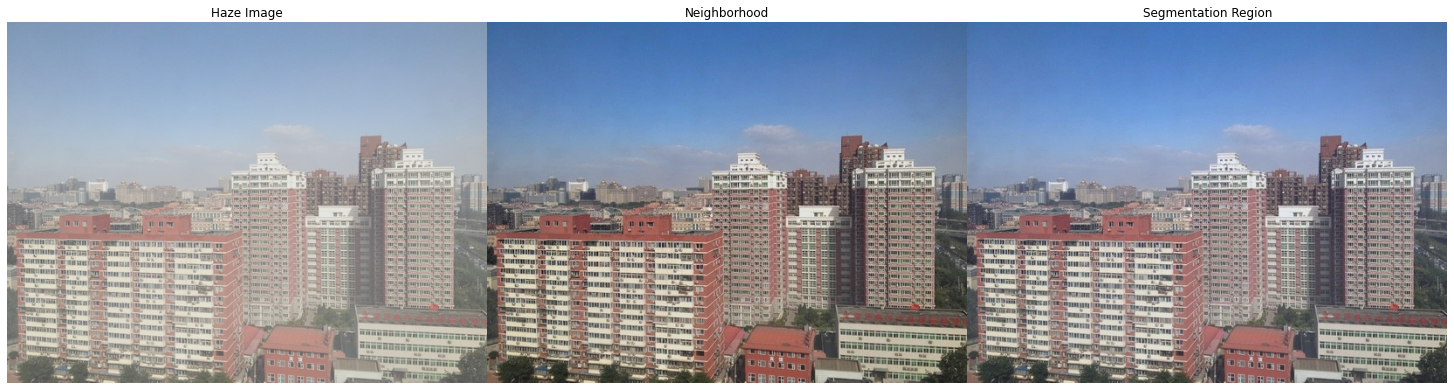

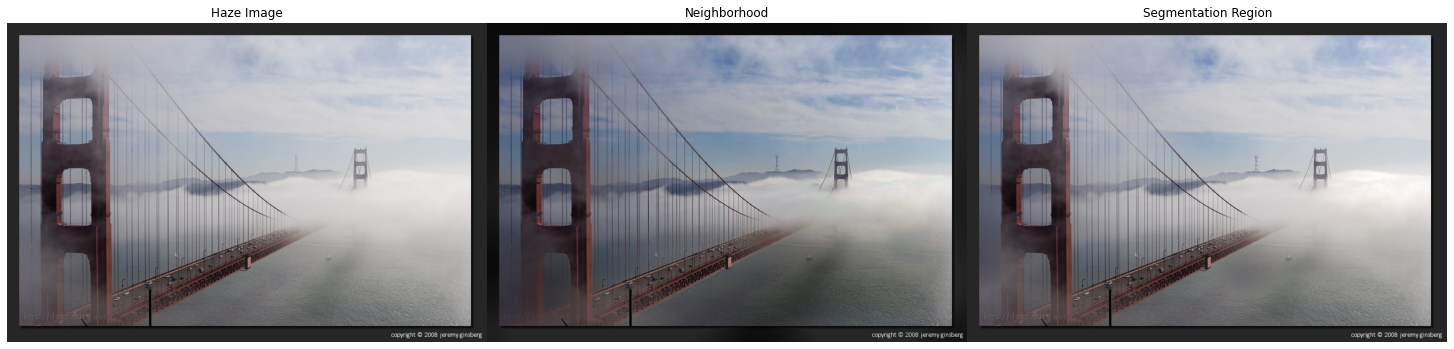

In [21]:
J_nei = calfinalimage(I, tR_nei, A_nei)
J_seg = calfinalimage(I, tR_seg, A_seg)

cv2.imwrite('Images/nei.jpg', J_nei * 255)
cv2.imwrite('Images/seg.jpg', J_seg * 255)

ori = cv2.imread('Images/nei.jpg')
seg = cv2.imread('Images/seg.jpg')

#convert BGR format to RGB format
rgb_nei = cv2.cvtColor(ori, cv2.COLOR_BGR2RGB) 
rgb_seg = cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(ncols=3, figsize=(20, 15))
ax[0].imshow(rgb_I)
ax[0].set_title("Haze Image")
ax[0].axis('off')
ax[1].imshow(rgb_nei)
ax[1].set_title("Neighborhood")
ax[1].axis('off')
ax[2].imshow(rgb_seg)
ax[2].set_title("Segmentation Region")
ax[2].axis('off')
plt.tight_layout(pad=0.00)
plt.show()

bridge_I = plt.imread('Images/marin-headlands-bridge.jpg')
bridge_nei = plt.imread('Images/bridge_dehaze_nei.jpg')
bridge_seg = plt.imread('Images/bridge_dehaze_seg.jpg')
fig, ax = plt.subplots(ncols=3, figsize=(20, 15))
ax[0].imshow(bridge_I)
ax[0].set_title("Haze Image")
ax[0].axis('off')
ax[1].imshow(bridge_nei)
ax[1].set_title("Neighborhood")
ax[1].axis('off')
ax[2].imshow(bridge_seg)
ax[2].set_title("Segmentation Region")
ax[2].axis('off')
plt.tight_layout(pad=0.00)
plt.show()

## 3.4 Image Dehazing with Boundary Constraint and Contextual Regularization

 In this section, we look at haze removal with a boundary constraint of the effect of haze in an image. The following is an implementation of the following paper:<br>
 https://www.cv-foundation.org/openaccess/content_iccv_2013/papers/Meng_Efficient_Image_Dehazing_2013_ICCV_paper.pdf

### 3.4.1 Model
A hazy image can be linealy modelled as:<br>
$$\begin{align}
\tag{1}
I(x) = t(x)J(x) + (1 - t(x))A 
\end{align}$$ <br>

*I(x)* is the observed image <br>
*J(x)* is the scene radiance (original image without haze) <br>
*A* is the global atmospheric light <br><br>
$t(x)$ is the scene transmission, correlated with the scene depth as : <br>
$$\begin{align} t(x) = e^{-\beta d(x)} 
\end{align}$$ <br>
*$\beta$* is the medium extinction coefﬁcient<br>
*d(x)* is the scene depth


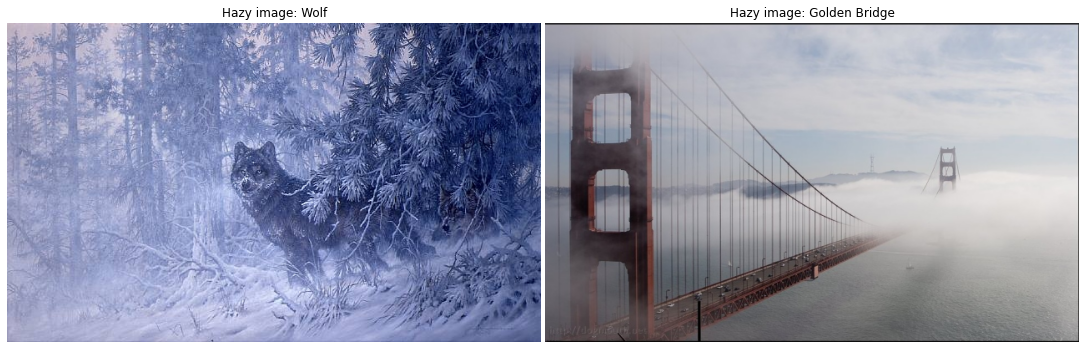

In [22]:

HazeImg= plt.imread('Images/wolf.jpg')
HazeImg2 = plt.imread('Images/bridge.jpg')
# resize image
HazeImg2 = cv2.resize(HazeImg2, (HazeImg.shape[1] ,HazeImg.shape[0]), interpolation = cv2.INTER_AREA)

fig, ax = plt.subplots(ncols=2, figsize=(15, 10))
ax[0].imshow(HazeImg);
ax[1].imshow(HazeImg2);
ax[1].set_title("Hazy image: Golden Bridge");
ax[0].set_title("Hazy image: Wolf");
ax[0].axis('off');
ax[1].axis('off');
plt.tight_layout(pad=0.4)

### 3.4.2 Estimating Atmospheric light:
Atmospheric light is estimated by ﬁltering each color channel of an input image by
a minimum ﬁlter with a moving window. <br>
Atmospheric light is calculated using the dark channel prior discuessed earlier: <br> <br>
$$ \begin{align}
\tag{2}
A = J^{dark}(x) = \min_{ c \in \{r,g,b\} } (\min_{y \in \Omega(x) } J^{c}(x) ), 
\end{align}$$<br>


In [23]:

#Airlight calculation using dark channel
windowSize = 15
A = []
# Find the minimum of all channels in a window of 15x15
for ch in range(len(HazeImg.shape)):
    kernel = np.ones((windowSize, windowSize), np.uint8)
    minImg = cv2.erode(HazeImg[:, :, ch], kernel)
    A.append(int(minImg.max()))

### 3.4.3 Boundary Constraint 
Introduce a constraint on scene radiance: <br>
$ \begin{align}
C_{0}  \leq J(x) \leq C_{1} \forall x \in \omega
\end{align} $ <br>
J(x) must be located in the radiance cube bounded by $C_{0}$ and $C_{1}$ :
<center><img src="Images/radiance_cube.png" width=300px alt="default"/></center>

    Source: Efﬁcient Image Dehazing with Boundary Constraint and Contextual Regularization,Gaofeng MENG, Ying WANG, Jiangyong DUAN, Shiming XIANG, Chunhong PAN

<br> <br>
This introduces a new constraint on $ t(x)$ (from (1) ): <br>
$ \begin{align}
0 \leq t_{b}(x) \leq 1,
\end{align} $ <br>
$$ \begin{align}
\tag{3}
\Rightarrow
t_{b}(x) = min  \left\{ \max_{ c \in \{r,g,b\} } \left( \frac{A^{c}- I^{c}(x)}{A^{c}- C^{c}_{0}}, \frac{A^{c}- I^{c}(x)}{A^{c}- C^{c}_{1}} \right), 1 \right\}
\end{align} $$ <br>
<br> Now, we assume that the transmission (depth) in a local image patch is constant, we calculate the patch-wise transmission as:
$$ \begin{align}
 \tilde{t}(x) = \max_{ y \in \omega_{x}} t_{b}(y),
 \end{align} $$ <br>
 which can be computed using morphological closing on $ t_{b}(x) $

In [24]:
# Apply Boundary Conditions to find t_b(x)

windowSize = 3
C0 = 20         # Default value = 20 (as recommended in the paper)
C1 = 300        # Default value = 300 (as recommended in the paper)

#For colored images, calculate lower bound on t(x)
if(len(HazeImg.shape) == 3):
    t_b_blue = np.maximum((A[0] - HazeImg[:, :, 0].astype(np.float64)) / (A[0] - C0),
                     (HazeImg[:, :, 0].astype(np.float64) - A[0]) / (C1 - A[0]))
    t_b_green = np.maximum((A[1] - HazeImg[:, :, 1].astype(np.float64)) / (A[1] - C0),
                     (HazeImg[:, :, 1].astype(np.float64) - A[1]) / (C1 - A[1]))
    t_b_red = np.maximum((A[2] - HazeImg[:, :, 2].astype(np.float64)) / (A[2] - C0),
                     (HazeImg[:, :, 2].astype(np.float64) - A[2]) / (C1 - A[2]))

    maxVal = np.maximum(t_b_blue, t_b_green, t_b_red)
    t_lowerbound = np.minimum(maxVal, 1)
#For grayscale images, calculate lower bound on t(x)
else:
    t_lowerbound = np.maximum((A[0] - HazeImg.astype(np.float64)) / (A[0] - C0),
                     (HazeImg.astype(np.float64) - A[0]) / (C1 - A[0]))
    t_lowerbound = np.minimum(transmission, 1)

kernel = np.ones((windowSize, windowSize), np.float64)
t_lowerbound = cv2.morphologyEx(t_lowerbound, cv2.MORPH_CLOSE, kernel=kernel)



In [25]:
#Supporting functions for the upcoming code
def psf2otf(psf, shape):
    """
    Convert point-spread function to optical transfer function.
    Compute the Fast Fourier Transform (FFT) of the point-spread
    function (PSF) array and creates the optical transfer function (OTF)
    array that is not influenced by the PSF off-centering.
    ----------
    Adapted from MATLAB psf2otf function
    """
    if np.all(psf == 0):
        return np.zeros_like(psf)

    inshape = psf.shape
    # Pad the PSF to outsize
    psf = zero_pad(psf, shape, position='corner')

    # Circularly shift OTF so that the 'center' of the PSF is
    # [0,0] element of the array
    for axis, axis_size in enumerate(inshape):
        psf = np.roll(psf, -int(axis_size / 2), axis=axis)

    # Compute the OTF
    otf = np.fft.fft2(psf)

    n_ops = np.sum(psf.size * np.log2(psf.shape))
    otf = np.real_if_close(otf, tol=n_ops)

    return otf

def zero_pad(image, shape, position='corner'):
    """
    Extends image to a certain size with zeros
    Parameters
    """
    shape = np.asarray(shape, dtype=int)
    imshape = np.asarray(image.shape, dtype=int)

    if np.alltrue(imshape == shape):
        return image

    if np.any(shape <= 0):
        raise ValueError("ZERO_PAD: null or negative shape given")

    dshape = shape - imshape
    if np.any(dshape < 0):
        raise ValueError("ZERO_PAD: target size smaller than source one")

    pad_img = np.zeros(shape, dtype=image.dtype)

    idx, idy = np.indices(imshape)

    if position == 'center':
        if np.any(dshape % 2 != 0):
            raise ValueError("ZERO_PAD: source and target shapes "
                             "have different parity.")
        offx, offy = dshape // 2
    else:
        offx, offy = (0, 0)

    pad_img[idx + offx, idy + offy] = image

    return pad_img

def circularConvFilt(Img, Filter):
    FilterHeight, FilterWidth = Filter.shape
    assert (FilterHeight == FilterWidth), 'Filter must be square in shape --> Height must be same as width'
    assert (FilterHeight % 2 == 1), 'Filter dimension must be a odd number.'

    filterHalsSize = int((FilterHeight - 1)/2)
    rows, cols = Img.shape
    PaddedImg = cv2.copyMakeBorder(Img, filterHalsSize, filterHalsSize, filterHalsSize, filterHalsSize, borderType=cv2.BORDER_WRAP)
    FilteredImg = cv2.filter2D(PaddedImg, -1, Filter)
    Result = FilteredImg[filterHalsSize:rows+filterHalsSize, filterHalsSize:cols+filterHalsSize]
    return(Result)


### 3.4.4 Estimation of scence transmission and atmospheric light
<br>
We assumed that pixels in a local image patch will share a similar depth value. Based on this assumption, we have derived a patch-wise transmission from the boundary constraint : $ \tilde{t}(x)$ <br> <br>

However, this contextual assumption often fails to image patches with abrupt depth jumps, leading to signiﬁcant halo artifacts in the dehazing results. <br>
We address this problem by introducing a weighting function $ W$ on the constraints. <br>
The weighting function has to be less for small depth differences and large for large depth differences within a patch.<br>
Since, no depth information is available to us, we use the squared difference in color vectors as a measure of depth.<br><br>
$$\begin{align}
W(x, y)=e^{-\|\mathbf{I}(x)-\mathbf{I}(y)\|^{2} / 2 \sigma^{2}}
 \end{align}$$ <br>
 
Integrating the weighing function for the entire region, gives us a constraint in our optimization problem, which is called contextual regularization.<br>
The weighing function is implemented as:<br>
 $$\begin{align}
 \tag{4}
 W_{j}(i) = e^{- \frac{\sum_{c \in \{r,g,b\}} |(D_{j} \otimes I^{c})_{i}|^{2}}{2\sigma^{2}}}
 \end{align}$$ <br>
 $ D_{j}$ is a first order differential operator.
 <br>
 $D_{j}$ is implemeted as a bank of filters consisting of Kirsh operators and Laplacian operators which are used to calculate edge strength in 8 directions. <br>

 To find an optimal transmission function $ t(x) $, we minimize the following objective function:
    
$$\begin{align}
\tag{5}
\frac{\lambda}{2} \parallel t-\hat{t}\parallel^{2} + \sum_{j \in \omega} \parallel W_{j} \circ (D_{j} \otimes t )\parallel_{1}
\end{align}$$ <br>

 
 

In [26]:
def AddKirschFilters():
    KirschFilters = []
    KirschFilters.append(np.array([[-3, -3, -3],
                                   [-3,  0,  5],
                                   [-3,  5,  5]]))
    
    KirschFilters.append(np.array([[-3, -3, -3],
                                   [-3,  0, -3],
                                   [ 5,  5,  5]]))
    
    KirschFilters.append(np.array([[-3, -3, -3],
                                   [5,  0,  -3],
                                   [5,  5,  -3]]))
    
    KirschFilters.append(np.array([[5, -3, -3],    [5, 0, -3],   [5, -3, -3]]))
    KirschFilters.append(np.array([[5, 5, -3],     [5, 0, -3],   [-3, -3, -3]]))
    KirschFilters.append(np.array([[5, 5, 5],      [-3, 0, -3],  [-3, -3, -3]]))
    KirschFilters.append(np.array([[-3, 5, 5],     [-3, 0, 5],   [-3, -3, -3]]))
    KirschFilters.append(np.array([[-3, -3, 5],    [-3, 0, 5],   [-3, -3, 5]]))
    KirschFilters.append(np.array([[-1, -1, -1],   [-1, 8, -1],  [-1, -1, -1]]))
    return(KirschFilters)

In [27]:

def CalculateWeightingFunction(HazeImg, Filter, sigma):

    # Computing the weight function... Eqn.(5) 
    HazeImageDouble = HazeImg.astype(float) / 255.0
    if(len(HazeImg.shape) == 3):
        Red = HazeImageDouble[:, :, 2]
        d_r = circularConvFilt(Red, Filter)
        Green = HazeImageDouble[:, :, 1]
        d_g = circularConvFilt(Green, Filter)
        Blue = HazeImageDouble[:, :, 0]
        d_b = circularConvFilt(Blue, Filter)
        WFun = np.exp(-((d_r**2) + (d_g**2) + (d_b**2)) / (2 * sigma * sigma))
    else:
        d = circularConvFilt(HazeImageDouble, Filter)
        WFun = np.exp(-((d ** 2) + (d ** 2) + (d ** 2)) / (2 * sigma * sigma))
    return(WFun)



### 3.4.5 Find optimal $t(x)$  
<br>
 We can optimize Eqn.(5) using variable splitting method. By introducing an auxiliary variable $u_{j}$, we can optimize the following cost function by alternating optimizations of $u_{j}$ and $t$
 <br>
 $$\begin{align}
\tag{6}
\frac{\lambda}{2} \parallel t-\hat{t}\parallel^{2} + \sum_{j \in \omega} \parallel W_{j} \circ u_{j} \parallel_{1}
+ \frac{\beta}{2} \left(\sum_{j \in \omega} \parallel u_{j}-D_{j}\otimes t \parallel_{2}^{2} \right)
\end{align}$$ <br>
 
 With $t$ fixed in Eqn.(6) we can solve for $u_{j}$ by minimizing the function: <br>
  $$\begin{align}
  \tag{7}
  u_{j}^{*} = max \left( |\alpha| - \frac{\omega}{\beta}, 0 \right) \cdot sign(\alpha)
  \end{align}$$ <br>
 Now, we fix $ u_{j} $ and optimize for $t$ in the following function:<br>
  $$\begin{align}
  \tag{8}
  t^{*} =   \mathscr{F}^{-1} \left(\frac{\frac{\lambda}{\beta}\mathscr{F}(\hat{t}+\sum_{j \in \omega}\overline{\mathscr{F}(D_{j})}\circ{}\mathscr{F}(u_{j})}{\frac{\lambda}{\beta}+ \sum_{j \in \omega} \overline{\mathscr{F}(D_{j})}\circ{} \mathscr{F}(D_{j})}\right)
  \end{align}$$ <br>
  where, $ \mathscr{F} $ is the 2-D Fourier transform and $\circ $ represents element wise multiplication
  <br>
  We repeat Eqn.(7) and Eqn.(8) iteratively to find the optimal $t(x)$
 

In [28]:
#Calculate transmission: t(x)
regularize_lambda = 1  #Try changing this
sigma = 0.5
t_x = t_lowerbound

rows, cols = t_x.shape

KirschFilters = AddKirschFilters()

# Normalize the filters
for idx, currentFilter in enumerate(KirschFilters):
    KirschFilters[idx] = KirschFilters[idx] / np.linalg.norm(currentFilter)
    
# Calculate W_j(i) for the filter bank (Eqn.5)
WFun = []
for idx, currentFilter in enumerate(KirschFilters):
    WFun.append(CalculateWeightingFunction(HazeImg, currentFilter, sigma))
# Precompute the constants that are later needed in the optimization step
tF = np.fft.fft2(t_x)
denominator = 0
for i in range(len(KirschFilters)):
    D = psf2otf(KirschFilters[i], (rows, cols))
    denominator = denominator + (abs(D) ** 2)

# Optimization loop
beta = 1                    
beta_max = 2**8             
beta_rate = 2*np.sqrt(2)   

while(beta < beta_max):
    gamma = regularize_lambda / beta
    # Fixing t first and solving for u (Eqn.7)
    numerator = 0
    for i in range(len(KirschFilters)):
        dt = circularConvFilt(t_x, KirschFilters[i])
        u = np.maximum((abs(dt) - (WFun[i] / (len(KirschFilters)*beta))), 0) * np.sign(dt)
        numerator = numerator + np.fft.fft2(circularConvFilt(u, cv2.flip(KirschFilters[i], -1)))
    # Fixing u and solving t (Eqn.8)
    t_x = np.abs(np.fft.ifft2((gamma * tF + numerator) / (gamma + denominator)))
    beta = beta * beta_rate


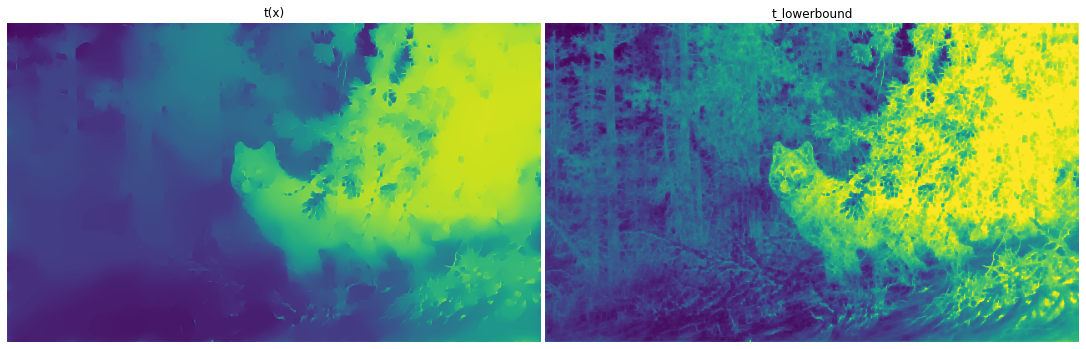

In [29]:
#Plot figures

fig, ax = plt.subplots(ncols=2, figsize=(15, 10))
ax[0].imshow(t_x)
ax[0].set_title("t(x)")
ax[0].axis('off')
ax[1].imshow(t_lowerbound)
ax[1].set_title("t_lowerbound")
ax[1].axis('off')
plt.tight_layout(pad=0.4)
plt.show()

### 3.4.6 Estimate dehazed image 
We can now calculate the estimated scene radiance $J(x) $ using:<br>
$ \begin{align}
J(x) = \frac{I(x)-A}{[max(t(x),\epsilon)]^{\delta}} + A
\end{align} $ <br>

In [30]:

# Perform dehazing 

delta = 0.85

epsilon = 0.0001
t_x = pow(np.maximum(abs(t_x), epsilon), delta)

correctedImage = copy.deepcopy(HazeImg)
# For colored images
if(len(HazeImg.shape) == 3):
    for ch in range(len(HazeImg.shape)):
        temp = ((HazeImg[:, :, ch].astype(float) - A[ch]) / t_x) + A[ch]
        temp = np.maximum(np.minimum(temp, 255), 0)
        correctedImage[:, :, ch] = temp
# For grayscale images
else:
    temp = ((HazeImg.astype(float) - A[0]) / t_x) + A[0]
    temp = np.maximum(np.minimum(temp, 255), 0)
    correctedImage = temp



### 3.4.7 Run the file 
Let us run the algorithm for a hazy image and find the output


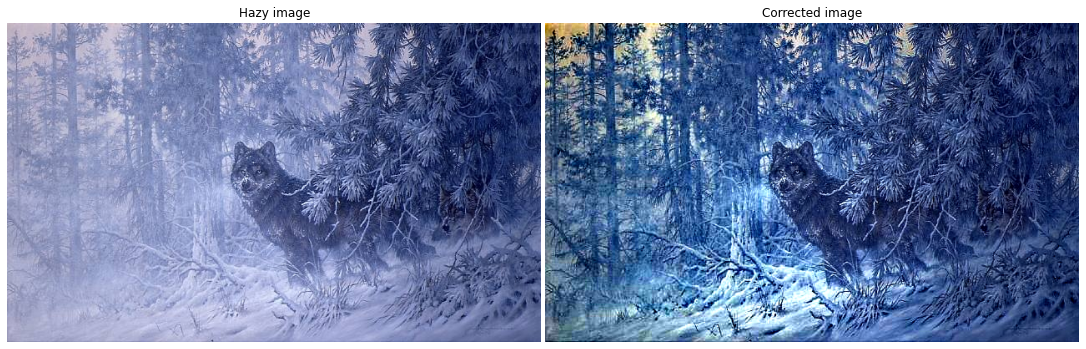

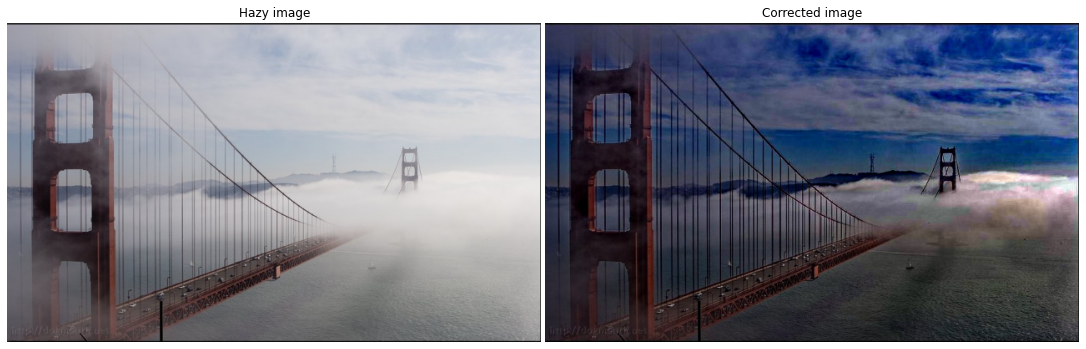

In [31]:
#Plot figures

fig, ax = plt.subplots(ncols=2, figsize=(15, 10))
ax[0].imshow(HazeImg)
ax[0].set_title("Hazy image")
ax[0].axis('off')
ax[1].imshow(correctedImage)
ax[1].set_title("Corrected image")
ax[1].axis('off')
plt.tight_layout(pad=0.4)
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15, 10))
ax[0].imshow(HazeImg2)
ax[0].set_title("Hazy image")
ax[0].axis('off')
Haze_image_bridg_bc = plt.imread('Images/bridge_dehaze_bc.jpg')
# resize image
Haze_image_bridg_bc = cv2.resize(Haze_image_bridg_bc, (HazeImg2.shape[1] ,HazeImg2.shape[0]), interpolation = cv2.INTER_AREA)
ax[1].imshow(Haze_image_bridg_bc)
ax[1].set_title("Corrected image")
ax[1].axis('off')
plt.tight_layout(pad=0.4)
plt.show()



## 4. Statistics 

To calculate the similarity between the haze-corrected image and ground truth, we will use mean squared error (MSE) and structural similarity index(SSIM)<br>
<br>
<b>MSE</b>
<br>
MSE is calculated using the following formula:<br>
$ \begin{align}
MSE=\sqrt{\sum_{i=1}^{n} \frac{\left(\hat{y}_{i}-y_{i}\right)^{2}}{n}}
\end{align} $ <br><br>
<b>SSIM</b> <br>
SSIM Index quality assessment is based on the computation of three factors: luminance, contrast and structure
<br>
<br>
The SSIM values range between 0 to 1.
<br>1 means a perfect match between the original image and the copy.
<br>
<br>
$ \begin{align}
\operatorname{SSIM}(x, y)=\frac{\left(2 \mu_{x} \mu_{y}+C_{1}\right)\left(2 \sigma_{x} y+C_{2}\right)}{\left(\mu_{x}^{2}+\mu_{y}^{2}+C_{1}\right)\left(\sigma_{x}^{2}+\sigma_{y}^{2}+C_{2}\right)}
\end{align} $ <br>

where,  $μ_{x} $, $μ_{y} $, $σ_{x}$,$σ_{y}$, and $σ_{xy}$ are the local means, standard deviations, and cross-covariance for images x, y.

The average of SSIM for 50 images was calculated for the SOTS and HSTS data set using all the above methods of haze removal<br><br>
Here are the results:
<br>
<table>
<tr>
<th><b>Type of data set </b></th>
<th><b>Average of 50 images </b></th>

<th><b>SSIM</b></th>
<th><b>MSE </b></th>
<th><b>Best method </b></th>

</tr>
<tr style="border-bottom:1px solid black">
    <td colspan="100%"></td>
</tr> 
    
<tr>
<td rowspan=6>Outdoor  </td>
<td>Hazy images</td>
<td>0.8294</td>
<td>9.9265</td> 
<td rowspan=6><b>SSIM:</b> Color Prior(Neighborhoood)<br><b>MSE:</b> Color Prior(Segmented)</td>
</tr>
<tr>
<td> Corrected images- DCP</td>
<td>0.8396</td>
 <td>9.5921</td>    
</tr> 
<tr>
<td> Corrected images- Histogram Equalization</td>
<td>0.7803</td>
<td>10.3267</td>    
</tr> 
<tr>
<td> Corrected images- Color Prior (Neighborhood)</td>
<td>0.9380</td>
 <td>9.5478</td>    
</tr>
<tr>
<td> Corrected images- Color Prior (Segmentation)</td>
<td>0.9090</td>
 <td>9.3960</td>    
</tr>
<tr>
<td>Corrected images- Boundary Constraint</td>
<td>0.7900</td>
 <td>9.9634</td>    
</tr> 

<tr style="border-bottom:1px solid black">
</tr> 
 
<tr>
<td rowspan=6 >Indoor</td>
<td>Hazy images</td>
<td>0.6369</td>
<td>10.1060</td> 
<td rowspan=6><b>SSIM:</b> Boundary Constraint<br> <b>MSE:</b> DCP</td>
</tr>
<tr>
<td>Corrected images- DCP</td>
<td>0.7811</td>
 <td>9.3376</td>    
</tr> 
<tr>
<td> Corrected images- Histogram Equalization</td>
<td>0.3303</td>
<td>10.1914</td>
</tr>
<tr>
<td> Corrected images- Color Prior (Neighborhood)</td>
<td>0.7916</td>
 <td>9.7307</td>    
</tr>
<tr>
<td> Corrected images- Color Prior (Segmentation)</td>
<td>0.7588</td>
 <td>9.8384</td>    
</tr>
<tr> 
<td>Corrected images- Boundary constraint</td>
<td>0.8151</td>
<td>9.7948</td> 
</tr>    
<tr style="border-bottom:1px solid black">
</tr> 
    
<tr>
<td rowspan=6>Synthetic </td>
<td>Hazy images</td>
<td>0.8045</td>
<td>9.8948</td> 
<td rowspan=6><b>SSIM:</b> Color Prior(Neighborhoood)<br><b>MSE:</b> DCP</td>
</tr>

<tr>
<td>Corrected images- DCP</td>
<td>0.8440</td>
<td>9.3786</td> 
</tr>  
<tr>
<td> Corrected images- Histogram Equalization</td>
<td> 0.7473</td>
<td>10.1606</td>    
</tr>
<tr>
<td> Corrected images- Color Prior (Neighborhood)</td>
<td>0.9162</td>
 <td>9.6196</td>    
</tr>
<tr>
<td> Corrected images- Color Prior (Segmentation)</td>
<td>0.9090</td>
 <td>9.3960</td>    
</tr>
<tr>
<td>Corrected images- Boundary Constraint</td>
<td>0.8895</td>
<td>9.5820</td> 
</tr>     
    
</table>
<br>
<tr style="border-bottom:1px solid black">
</tr> 
<br> We can see that, the best technique to remove haze is dependant on the type of image dataset. <br>We must also keep in mind that these indicators do not consider the amount of haze removed. They are just comaprisions betweeen the ground truth(haze-free image) and hazy image. 

Link to data-set:<br>
<b> RESIDE: </b> https://sites.google.com/view/reside-dehaze-datasets <br>


## 5. Underwater Image Restoration By Blue-Green Channels Dehazing and Red Channel Correction

### 5.1 The Challenge and Proposed Solution
Capturing clear underwater images is challenging due to various reasons namely,  <br>
  - Physical properties of underwater environment <br>
  - Effects of absorption and scattering <br>
  - Varying attenuation of light in different wavelengths <br>
    
<figure>
<center> <img src ="Images/lightinwater.jpg" style="width:500px;height=500px"/></center>
<figcaption align = "center"><b>Fig.1 -This figure plots the differeing light intensities in water [4]</figcaption>
</figure> 
                                  
An underwater image can be decomposed into the superposition of a *direct*, *forward-scattering* and a *back-scattering* component. The forward scattering causes blurring of the image while the back-scattering masks the details of the senarios.  
<br>
With the help of Fig.1, we make the following obsevations: <br>
 - Red light is more easily absorbed than blue or green light
 - The shorter wavelengths of green and blue light scatter more than the long wavelength of red light
<br>
    
In [4], the following method is proposed for de-hazing of underwater images - using a modified version the Dark Channel Prior method to first de-haze the blue and green channels followed by the Red channel correction using the *Gray World Assumption theory*.

### 5.2 Flowchart 
<figure>
<center> <img src ="Images/flowchart.jpg" style="width:500px;height=500px"/></center>
<figcaption align = "center"><b>Fig.2 -This figures depticts the flowchart for step-by-step implementation of the proposed method [4]</figcaption>
</figure> 
           
 

In [35]:
from IPython.display import HTML
from IPython.display import display

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

In [36]:


def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path
            
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing Jupyter notebook from %s" % path)
                                       
        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)

        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

sys.meta_path.append(NotebookFinder())

# Importing the required libraries and supporting functions
from extras.DetermineDepth import determineDepth
from extras.TransmissionEstimation import getTransmission
from extras.getAdaptiveSceneRadiance import AdaptiveSceneRadiance
from extras.getAtomsphericLight import getAtomsphericLight
from extras.sceneRadianceGb import sceneRadianceGB
from extras.sceneRadianceR import sceneradiance
from extras.GuidedFilter import GuidedFilter
from extras.guidedfilter_He import guided_filter_he


In [37]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

def  refinedtransmission(transmission, img):
    # This function refines the transmission by using a guided filter to remove the halo effects
    gimfiltR = 50  # The size of the radius when guiding the filter
    eps = 10 ** -3  #The value of epsilon during bootstrap filtering

    guided_filter = GuidedFilter(img, gimfiltR, eps)
    transmission[:,:,0] = guided_filter.filter(transmission[:,:,0])
    transmission[:,:,1] = guided_filter.filter(transmission[:,:,1])
    transmission = np.clip(transmission, 0.1, 0.9)


    return transmission

In [38]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

def AdaptiveExposureMap(img, sceneRadiance, Lambda, blockSize):
    # Applied as the final step of the image correction process where the regions that are either too bright or too dark are
    # adjusted accordingly to provide a balanced scene
    minValue = 10 ** -2
    img = np.uint8(img)
    sceneRadiance = np.uint8(sceneRadiance)

    YjCrCb = cv2.cvtColor(sceneRadiance, cv2.COLOR_BGR2YCrCb)
    YiCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    normYjCrCb = (YjCrCb - YjCrCb.min()) / (YjCrCb.max() - YjCrCb.min())
    normYiCrCb = (YiCrCb - YiCrCb.min()) / (YiCrCb.max() - YiCrCb.min())
    Yi = normYiCrCb[:, :, 0]
    Yj = normYjCrCb[:, :, 0]
    Yi = np.clip(Yi, minValue,1)
    Yj = np.clip(Yj, minValue,1)

    S = (Yj * Yi + 0.3 * Yi ** 2) / (Yj ** 2 + 0.3 * Yi ** 2)

    gimfiltR = 50  # The size of the radius when guiding the filter
    eps = 10 ** -3  # The value of epsilon during bootstrap filtering

    guided_filter = GuidedFilter(YiCrCb, gimfiltR, eps)

    refinedS = guided_filter.filter(S)

    S_three = np.zeros(img.shape)
    S_three[:, :, 0] = S_three[:, :, 1] = S_three[:, :, 2] = refinedS

    return S_three

### 5.3 Blue-Green Channels Dehazing 

Now, the attenuation of the blue and green channels result from scattering which is similar to the type of attenuation seen in tradionally terrestrial images. Based on this intuition, we can then describe the underwater imaging model described as  <br><br>
$ \begin{align}
I^{c}(x) = J^{c}(x)t(x) + B^{c}(1-t(x)), c \in \{g,b\}
\end{align} $ <br><br>
Here, <br>
    $I(x)$ : Observed image <br>
    $J(x)$ : Restored image <br>
    $B$ : Background light <br>
    $t(x) \in [0,1]$ is the medium transmission map based on camera parameters
<br>
<br>
The Background light *B* can be estimated from the knowledge that the Red channel attuates much faster than the green and blue channels underwater. First, the largest difference *D(x)* is computed by finding the difference between the maximum intensity of the red channel and the maximum intensity of the green and blue channels. <br><br>
$ \begin{align}
D(x) = \max_{ x \in \Omega,c \in r } I^{c}(x) - \max_{ x \in \Omega,c \in \{g,b\} } I^{c}(x)
\end{align} $ <br><br>

Here, $\Omega$ corresponds to a local patch in the image. From this, *B* is estimated as:
<br>
<br>
$ \begin{align}
B^{c} = avg(I^{c}(arg \min_{x} D(x))), c \in \{g,b\}
\end{align} $ <br><br>


### 5.4 Transmission Map for Blue and Green Channels
Based on the Rayleigh scattering theory the following assumptions are valid: 
 - Blue and Green channels have equal attenuation underwater
 - Transmission map for a given patch is same for both channels 
 
<br>
To find the transmission map we minimise the imaging model equation over $c$ and simplify based on Dark Channel Prior theory. Rearranging the resulting equation we get: <br>
$ \begin{align}
t(x) = 1 - \min_{c \in \{g,b\}}(\min_{x\in\Omega}(\frac{I^{c}(x)}{B^{c}}))
\end{align} $ <br>
<figure>
<center> <img src ="Images/guided.jpg" style="width:500px;height=500px"/></center>
<figcaption align = "center"><b>Fig.3- Medium Transmission map (a) Original underwater image (b) Coarse transmission map (c) Refined medium transmission maps [4]</figcaption>
</figure> 

Fig.3(b) shows *halo* effects and block artifacts seen in the coarse tranmission map. This is because the coarse transmission map is a rough estimate over a patch of image. To fine-tune the transmission map, the coarse estimates are refined with the help of the guided filter which results in a more clear *t(x)* as seen in Fig.3(c).

### 5.5 Restored haze-free Blue-Green Channels
The last step to the de-hazing process of the Blue-Green channels is restoring the respective channels after correction. This is done by a simple back-substitution of the estimated parameters into the original image equation as
<br><br>
$ \begin{align}
J^{c}(x) = \frac{I^{c}(x)-B^{c}}{t^{c}(x)}+B^{c}, c\in\{g,b\}
\end{align} $ <br>
where $J^{c}(x)$ represents the restored channel.

### 5.6 Red Channel Correction
It is not straightforward to calculate the absorption rate for red light. Therefore the red light correction is done based on the Gray-World assumption theory which states that the average value of object color in an ideal image is gray. The following assumption forms the basis for the red channel correction process:
<br><br>
 $ \begin{align}
(avgRr + avgBr +avgGr)/3 = 0.5
\end{align} $ <br>
<br>
Here, *avgR*,*avgB* and *avgG* are the normalized average values of the respective recorvered channels. 
Then, the average value of the recovered red channel is estimated as:<br><br>
 $ \begin{align}
avgRr = 1.5 - avgBr - avgGr
\end{align} $ <br>
<br>
The estimated *compensation coefficient*, $\delta$ is 
<br>
$ \begin{align}
\delta = avgRr / avgR
\end{align} $ <br>
<br>
where, <br>
$avgR$ : Normalised *average* value of original red channel
<br><br>
Finally, the recovered red channel is found as:<br>
<br>
$ \begin{align}
Rrec = R .* \delta
\end{align} $ <br>
<br>

### 5.7 Adaptive Exposure Map Estimation
Some bright and dark parts of the image become too dark or bright after the dehazing and correction process. To restore the right amount of brightness/darkness an Adaptive Exposure Map is implemented on the image. This Adaptive Exposure Map $s(x)$ is obtained by solving an optimization problem. 
<br>
<br>
$ \begin{align}
\min_{s}\sum_{x}\{[1-s(x)\frac{Y_{J(x)}}{Y_{I(x)}}]^{2} + \lambda[s(x) - 1]^{2}\} + \phi(s)
\end{align} $ <br>
<br>
Here, <br>
$s(x)$: The adaptive exposure map <br>
$Y_{J}$: Illumination intensity of restored image <br>
$\lambda$: A tuning hyperparameter set to $0.3$ <br>
$\phi(.)$: Smoothness regularization <br><br>

This optimization problem can be solved in two steps:
 - Solve $s(x)$ without the smoothness rgularization
 - Apply guided filter to smooth the solution
<br><br>

The output after optimization can be obtained as: <br><br>
$ \begin{align}
OutputExp = J^{c}(x).*s(x), c\in\{r,g,b\}
\end{align} $ <br>
<br>

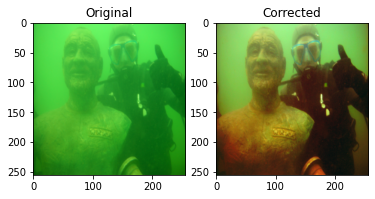

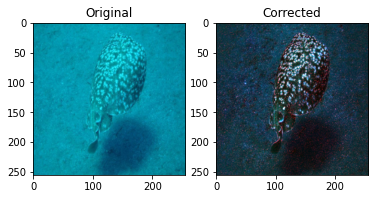

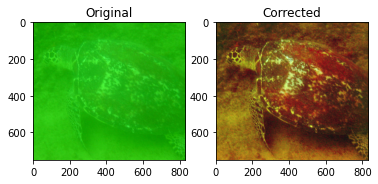

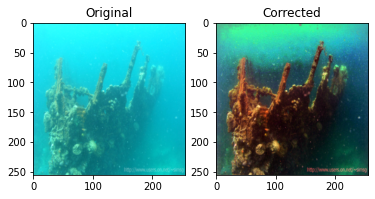

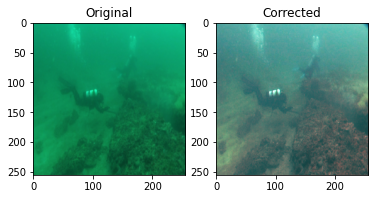

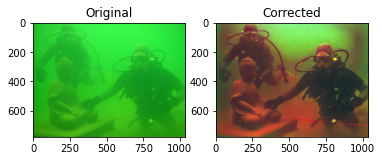

Time 0:01:04.881386


In [39]:
from IPython.display import HTML
from IPython.display import display

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

if __name__ == '__main__':
    pass
starttime = datetime.datetime.now() #Records the time taken to run the code 

folder = (os.path.abspath("."))
path = folder + "/Datasets"
files = os.listdir(path)
files =  natsort.natsorted(files)

for i in range(len(files)):
    file = files[i]
    filepath = path + "/" + file
    prefix = file.split('.')[0]
    if os.path.isfile(filepath):
        img1 = cv2.imread(folder +'/Datasets/' + file)
        img = (img1 - img1.min()) / (img1.max() - img1.min()) * 255
        blockSize = 9
        largestDiff = determineDepth(img, blockSize)
        #print(largestDiff)
        AtomsphericLight, AtomsphericLightGB, AtomsphericLightRGB = getAtomsphericLight(largestDiff, img)
       # print('AtomsphericLightRGB',AtomsphericLightRGB)
        transmission = getTransmission(img, AtomsphericLightRGB, blockSize)
        transmission = refinedtransmission(transmission, img)

        sceneRadiance_GB = sceneRadianceGB(img, transmission, AtomsphericLightRGB)
        sceneRadiance = sceneradiance(img, sceneRadiance_GB)

        S_x = AdaptiveExposureMap(img, sceneRadiance, Lambda=0.3, blockSize=blockSize)
        sceneRadiance_adap = AdaptiveSceneRadiance(sceneRadiance, S_x)

        sceneRadiance_adap = cv2.cvtColor(sceneRadiance_adap, cv2.COLOR_BGR2RGB)
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 2, 1)
        plt.imshow(img1)
        plt.gca().set_title('Original')
        plt.subplot(1, 2, 2)
        plt.imshow(sceneRadiance_adap)
        plt.gca().set_title('Corrected')
        plt.show()

Endtime = datetime.datetime.now()
Time = Endtime - starttime
print('Time', Time)

## 6. Comparison to Other Methods
In order to further highleten the requirement for the three color channels to be given the treatment as discussed above for underwater images we compare the results of the Green-Blue channel dehazing, Red channel correction method with the dehazing algorithms proposed for traditionally teresstrial images.
<br>
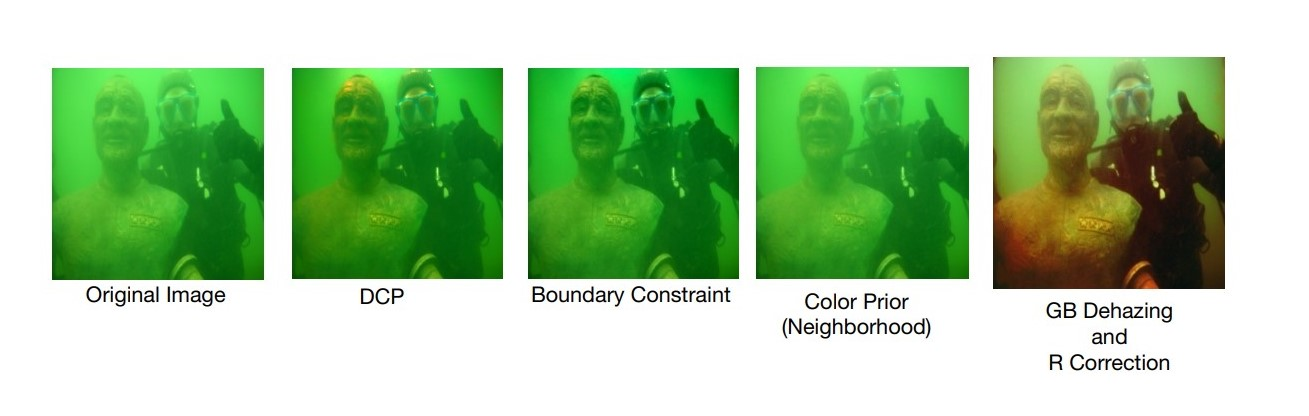

<br>
Here, we see that the traditional method of Dark Channel Prior gives poor results when it comes to de-hazing and color correcting an underwater image. This once again affirms our observation that different datasets require different methods for de-hazing and color correction. 

## 7. References
[1] Kumar, Khitish and Panda, Niranjan. (2013). A Survey on Image Dehazing Methods. International Journal of Engineering and Technical Research. 2. 462-466.<br> 
[2] Szeliski, Richard. Computer Vision: Algorithms and Applications. London, Springer, 2011.<br>
[3] Kaiming He, Jian Sun and Xiaoou Tang, "Single image haze removal using dark channel prior," 2009 IEEE Conference on Computer Vision and Pattern Recognition, 2009, pp. 1956-1963, doi: 10.1109/CVPR.2009.5206515.<br>
[4] Zhou Wang, Alan Conrad Bovik, Hamid Rahim Sheikh and Eero P. Simoncelli. Image Quality Assessment: From Error Visibility to Structural Similarity
[5] Gaofeng MENG, Ying WANG, Jiangyong DUAN, Shiming XIANG, Chunhong PAN for their paper "Efficient Image Dehazing with Boundary Constraint and Contextual Regularization"<br>
[6] Zhu, Qingsong, Jiaming Mai, and Ling Shao. "A fast single image haze removal algorithm using color attenuation prior." IEEE transactions on image processing 24.11 (2015): 3522-3533.

    